## Notebook Summary
#### *Capstone: EDA & Data Visualization*
---
This contents of this notebook includes EDA of raw discipline data and merged dataset and data visualizations that will be used during the presentation. I performed EDA several times throughout the process.

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

This discipline data was cleaned for the modeling dataset. In order to do EDA on the data and it's original contents, I need to perform minimal data cleaning and merging prior to.

In [2]:
#read in raw discipline data
discipline_18_raw = pd.read_excel('datasets/18-20-eoy-student-discipline.xlsx', sheet_name = '2018', header=3)
discipline_19_raw = pd.read_excel('datasets/18-20-eoy-student-discipline.xlsx', sheet_name = '2019', header=3)
discipline_20_raw = pd.read_excel('datasets/18-20-eoy-student-discipline.xlsx', sheet_name = '2020', header=3)

In [3]:
#make sure all columns are in the same order
cols = ['District Name', 'School Name', 'ActionCode', 'ActionDesc',
       'Total Incidents', 'Total Students', 'Female', 'Male',
       'Hispanic or Latino', 'American Indian or Alaska Native',
       'Black or African American', 'Asian',
       'Native Hawaiian or Other Pacific Islander', 'White',
       'Two or More Races', 'Grade K thru 8', 'Grade 9 thru 12', 'EL',
       'Alcohol', 'Violence With Physical Injury',
       'Violence Without Physical Injury', 'Drug Offenses',
       'Dangerous Weapon: Firearm', 'Dangerous Weapon: Other', 'Other Reason',
       'Tobacco', 'Less than 1', '[1,2)', '[2,3)', '[3,4)', '[4,10]',
       'GREATER THAN 10', 'NOT REPORTED']

#reorder columns
discipline_18 = discipline_18_raw[cols]
discipline_19 = discipline_19_raw[cols]
discipline_20 = discipline_20_raw[cols]

#create a year col
discipline_18['School Year'] = '17-18'
discipline_19['School Year'] = '18-19'
discipline_20['School Year'] = '19-20'

#### By Discipline Type

In [4]:
#merge dfs together for EDA
discipline_df = pd.concat([discipline_18, discipline_19, discipline_20], axis=0, ignore_index=True)

In [5]:
#drop rows where School Name is null
discipline_df = discipline_df[~discipline_df['School Name'].isna()]

In [6]:
#create new dfs splitting suspensions and expulsions
suspension = discipline_df[~discipline_df['ActionDesc'].str.contains('Expulsion')]
expulsion = discipline_df[~discipline_df['ActionDesc'].str.contains('Suspension')]

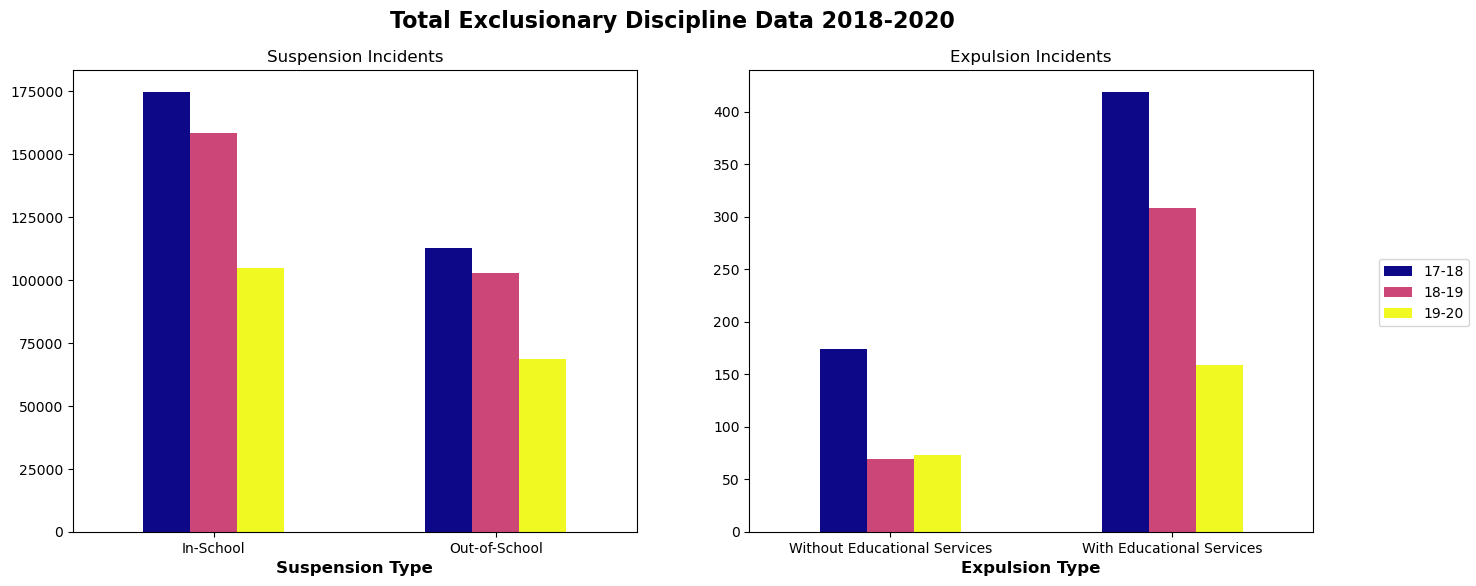

In [7]:
#create subplots
fig,ax = plt.subplots(1,2, figsize=(16,6))

#plot graphs
plt1 = suspension.groupby(['ActionDesc', 'School Year'])[['Total Incidents']].sum().unstack().reset_index().plot(x='ActionDesc',
                                                                                                         kind='bar',
                                                                                                         stacked=False,
                                                                                                         title='Suspension Incidents',
                                                                                                         ax=ax[0],
                                                                                                         cmap = 'plasma',
                                                                                                         legend=False
                                                                                                     )

plt2 = expulsion.groupby(['ActionDesc', 'School Year'])[['Total Incidents']].sum().unstack().reset_index().plot(x='ActionDesc',
                                                                                                         kind='bar',
                                                                                                         stacked=False,
                                                                                                         title='Expulsion Incidents',
                                                                                                         ax=ax[1],
                                                                                                         cmap = 'plasma',
                                                                                                         legend=False)
#plot formatting
fig.suptitle('Total Exclusionary Discipline Data 2018-2020', fontsize=16, fontweight='bold')
plt1.set_xticklabels(['In-School', 'Out-of-School'],rotation=0)
plt1.set_xlabel('Suspension Type', fontsize=12, fontweight='bold');
plt2.set_xticklabels(['Without Educational Services', 'With Educational Services'],rotation=0)
plt2.set_xlabel('Expulsion Type', fontsize=12, fontweight='bold')

#legend for entire label
fig.legend(labels=['17-18', '18-19', '19-20'], loc='center right');

#export plot
plt.savefig('../Capstone/plots/discipline.png',dpi=300, bbox_inches = "tight")

#### By Length of Suspension

In [8]:
#grouping certain columns together by suspension length
susp_length = suspension.groupby(['School Year'])[['Total Incidents','Less than 1', '[1,2)', '[2,3)', '[3,4)', '[4,10]','GREATER THAN 10', 'NOT REPORTED']].sum().reset_index()

# #grouping cols together
# susp_length['[1, 4)'] = susp_length['[1,2)'] + susp_length['[2,3)'] + susp_length['[3,4)']

# #dropping old cols
# susp_length.drop(columns=['[1,2)', '[2,3)','[3,4)', 'NOT REPORTED'], inplace=True)

#turn raw col data into percent
cols_to_perc = ['Less than 1', '[1,2)', '[2,3)', '[3,4)', '[4,10]','GREATER THAN 10', 'NOT REPORTED']

for col in cols_to_perc:
    susp_length[f'{col}_%'] = (susp_length[col] / susp_length['Total Incidents'])*100

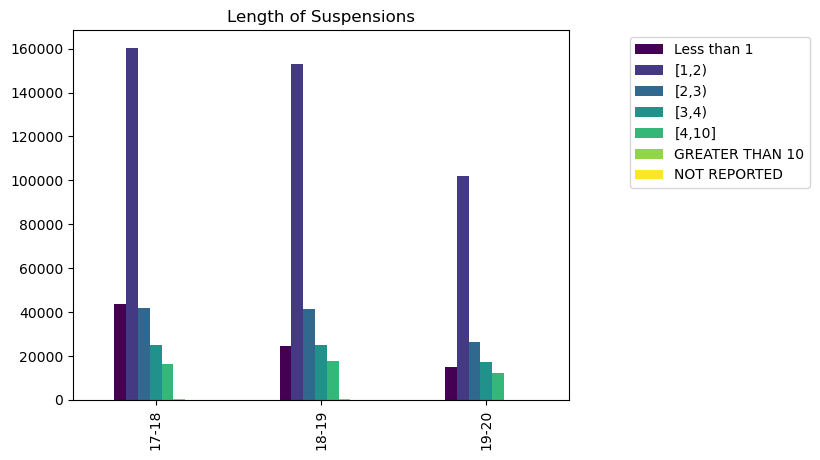

In [9]:
#plot suspension length graph
susp_length[['Less than 1', '[1,2)', '[2,3)', '[3,4)', '[4,10]','GREATER THAN 10', 'NOT REPORTED']].plot(kind='bar',
                                  stacked=False,
                                  title='Length of Suspensions',
                                 cmap='viridis');

plt.legend(labels=['Less than 1', '[1,2)', '[2,3)', '[3,4)', '[4,10]','GREATER THAN 10', 'NOT REPORTED'],
           loc='upper right', bbox_to_anchor=(1.5, 1.0))
plt.xticks(ticks=[0,1,2],labels=['17-18', '18-19', '19-20']);

#### By Gender

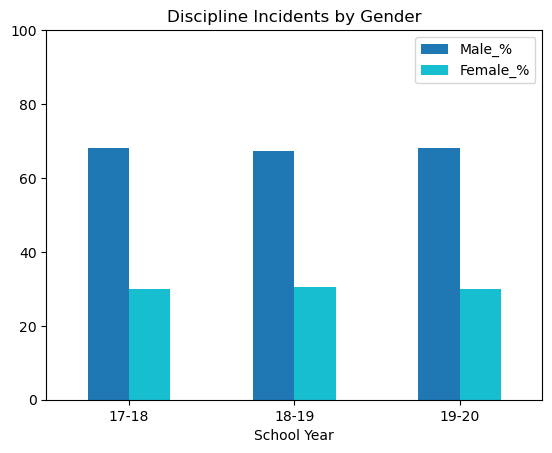

In [10]:
gender = discipline_df.groupby(['School Year'])[['Total Incidents', 'Male', 'Female']].sum()

#convert raw numbers into percent
cols_to_perc = ['Male', 'Female']

for col in cols_to_perc:
    gender[f'{col}_%'] = (gender[col] / gender['Total Incidents'])*100

#plot
gender[['Male_%', 'Female_%']].plot(kind='bar',
                                        title='Discipline Incidents by Gender',
                                        cmap='tab10')
plt.xticks(rotation=0)
plt.ylim(0,100);

#### By Race/Ethnicity

In [11]:
race = discipline_df.groupby(['School Year'])[['Total Incidents', 'Hispanic or Latino', 'American Indian or Alaska Native',
       'Black or African American', 'Asian',
       'Native Hawaiian or Other Pacific Islander', 'White',
       'Two or More Races']].sum()

#list of cols to convert to %
cols_to_perc = ['Hispanic or Latino', 'American Indian or Alaska Native',
       'Black or African American', 'Asian',
       'Native Hawaiian or Other Pacific Islander', 'White',
       'Two or More Races']

for col in cols_to_perc:
    race[f'{col}_%'] = (race[col] / race['Total Incidents'])*100
    

#reset index
race.reset_index(drop=False, inplace=True)

In [12]:
#create table with just the columns I need for plot
race_df = race[['School Year','Black or African American_%', 'Hispanic or Latino_%', 'White_%','American Indian or Alaska Native_%',
       'Asian_%', 'Native Hawaiian or Other Pacific Islander_%','Two or More Races_%']]

#add an unknown to equal percentages to 100%
race_df['Unknown_%'] = 100 - (race_df['Black or African American_%'] + race_df['Hispanic or Latino_%'] + race_df['White_%'] + race_df['American Indian or Alaska Native_%'] + race_df['Asian_%'] + race_df['Native Hawaiian or Other Pacific Islander_%'] + race_df['Two or More Races_%'])

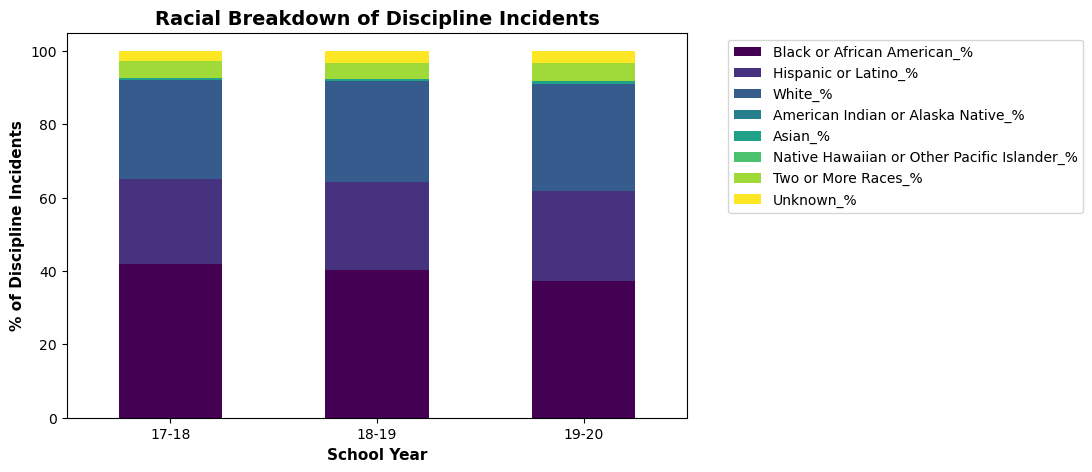

In [13]:
#plot
race_df.plot(x='School Year', kind='bar',
             stacked=True, cmap='viridis', figsize=(8,5))

plt.xticks(rotation=0)
plt.legend(labels=['Black or African American_%', 'Hispanic or Latino_%',
       'White_%', 'American Indian or Alaska Native_%', 'Asian_%',
       'Native Hawaiian or Other Pacific Islander_%', 'Two or More Races_%',
       'Unknown_%'], loc='upper right', bbox_to_anchor=(1.65, 1.0))

plt.title('Racial Breakdown of Discipline Incidents', fontweight='bold', fontsize=14)
plt.ylabel('% of Discipline Incidents', fontsize=11, fontweight='bold')
plt.xlabel('School Year', fontsize=11, fontweight='bold');

#export plot
plt.savefig('../Capstone/plots/race.png',dpi=300, bbox_inches = "tight")

## EDA on Combined Dataset w/ All Features + Target

In [14]:
# column names which need to be string
cols = ['nces_id', 'state_senate_district', 'state_representative_district', 'latcod', 'loncod']
dict_dtypes = {x: 'str' for x in cols}

df_adj = pd.read_csv('../Capstone/cleaned_datasets/pre-processing/df_k8_adj.csv', dtype=dict_dtypes)
df_adj.drop(columns='Unnamed: 0', inplace=True)

df = pd.read_csv('../Capstone/cleaned_datasets/pre-processing/df_k8.csv', dtype=dict_dtypes)
df.drop(columns='Unnamed: 0', inplace=True)

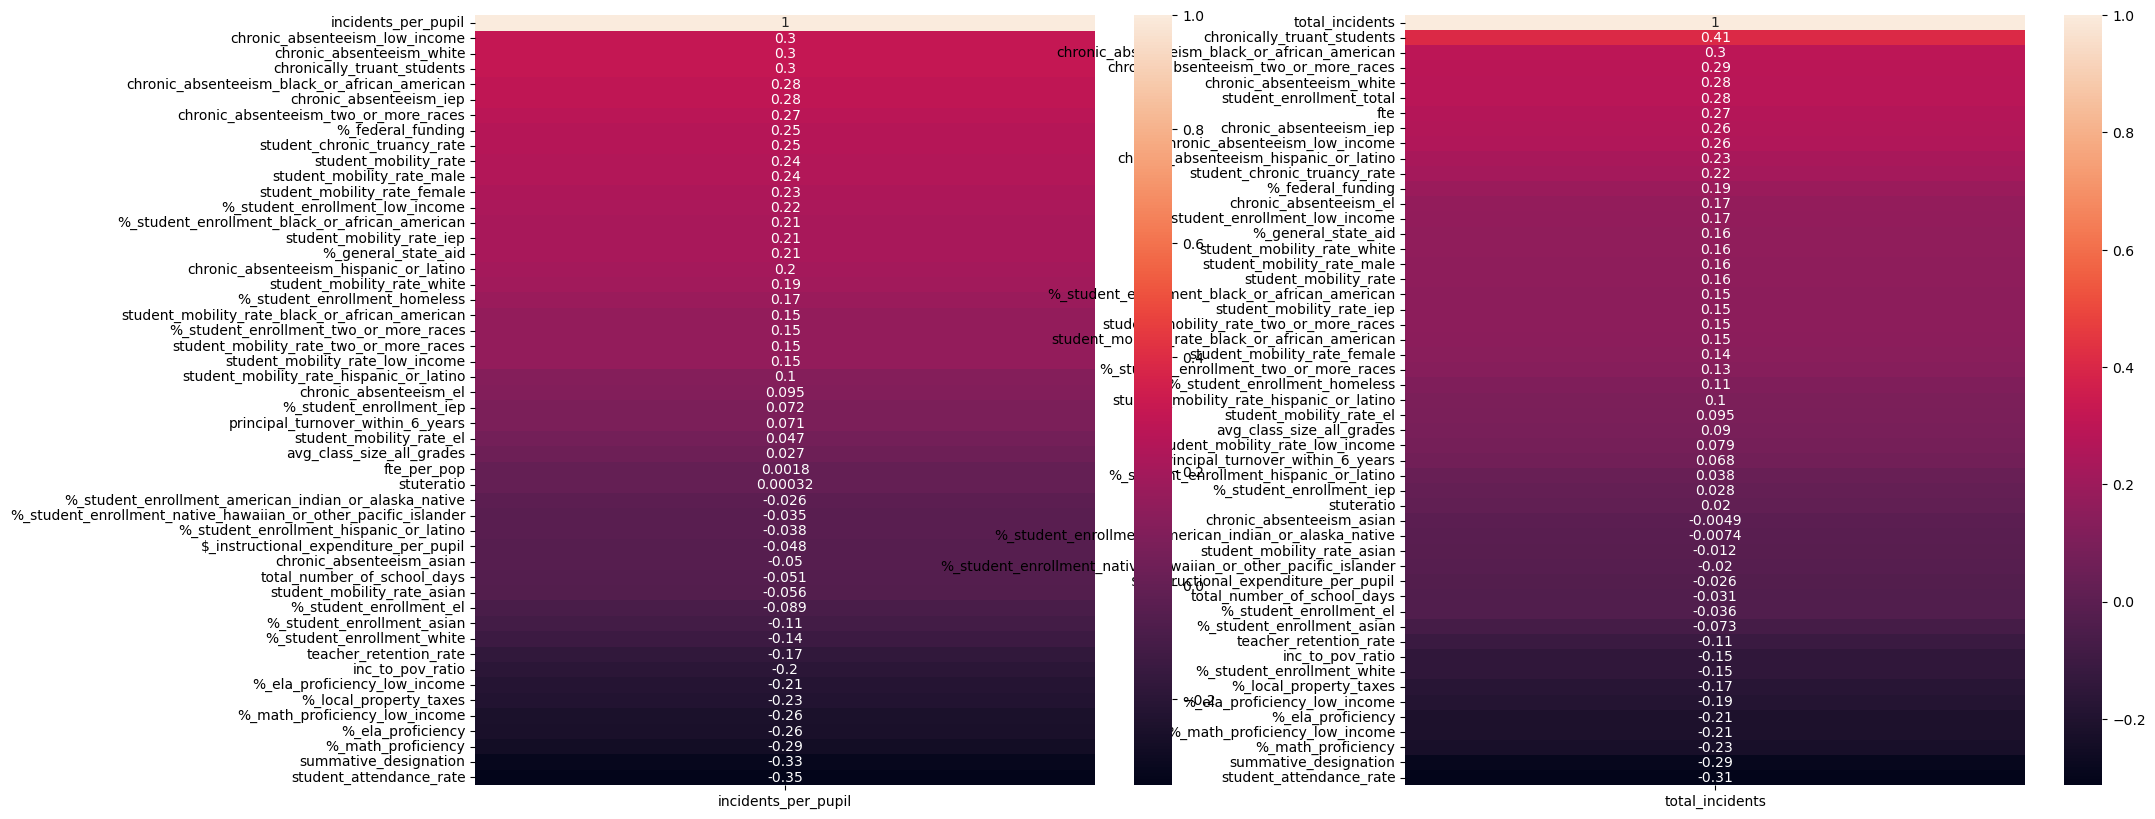

In [15]:
#create subplots
fig,ax = plt.subplots(1,2, figsize=(22,10))

sns.heatmap(df_adj.corr()[['incidents_per_pupil']].sort_values(by='incidents_per_pupil', ascending=False), annot=True, ax=ax[0])
sns.heatmap(df.corr()[['total_incidents']].sort_values(by='total_incidents', ascending=False), annot=True, ax=ax[1]);

#### Scatterplots between features for exploration

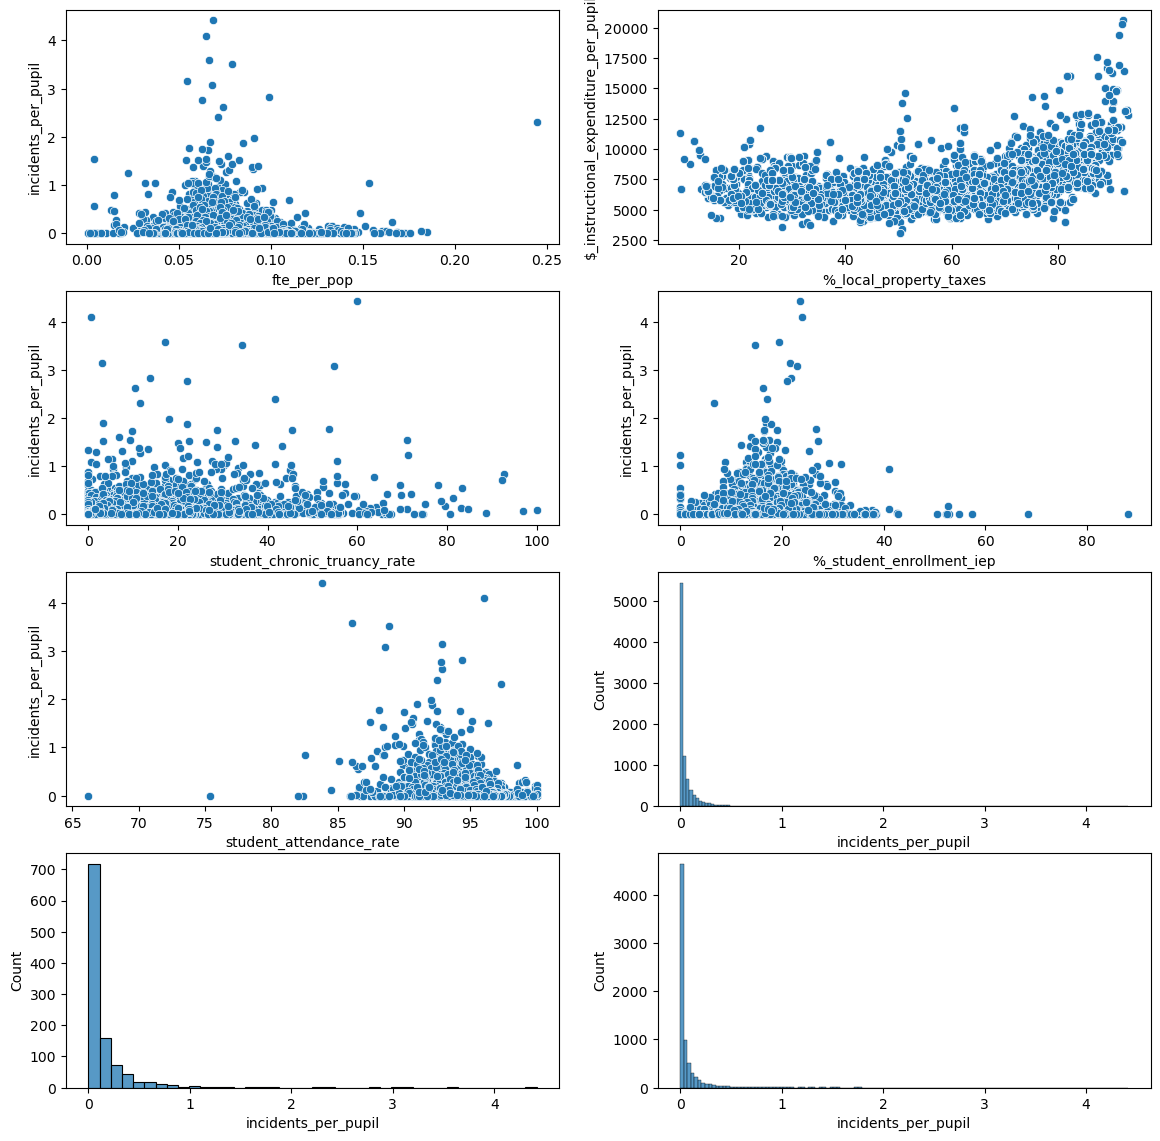

In [16]:
#create subplots
fig,ax = plt.subplots(4,2, figsize=(14,14))

sns.scatterplot(df_adj, x='fte_per_pop', y='incidents_per_pupil', ax=ax[0,0])
sns.scatterplot(df, y='$_instructional_expenditure_per_pupil', x='%_local_property_taxes', ax=ax[0,1])
sns.scatterplot(df_adj, x='student_chronic_truancy_rate', y='incidents_per_pupil', ax=ax[1,0])
sns.scatterplot(df_adj, x='%_student_enrollment_iep', y='incidents_per_pupil', ax=ax[1,1])
sns.scatterplot(df_adj, x='student_attendance_rate', y='incidents_per_pupil', ax=ax[2,0])
sns.histplot(df_adj, x='incidents_per_pupil', ax=ax[2,1], bins='scott'), #target is skewed
sns.histplot(df_adj[df_adj['%_student_enrollment_black_or_african_american'] >= 60], x='incidents_per_pupil', ax=ax[3,0], bins='scott'),
sns.histplot(df_adj[df_adj['$_instructional_expenditure_per_pupil'] >= 6_000], x='incidents_per_pupil', bins='scott', ax=ax[3,1]);

*Expenditure per pupil is pretty constant until % local property taxes hits about 75%*

In [17]:
# Grouping together region_type into smaller groupings
group = {('21-Suburb: Large', 'Suburb - Large'),
         ('11-City: Large', 'City - Large'),
         ('42-Rural: Distant', 'Rural'),
         ('32-Town: Distant', 'Town'),
         ('41-Rural: Fringe', 'Rural'),
         ('13-City: Small', 'City - Small/Mid-Size'),
         ('12-City: Mid-size', 'City - Small/Mid-Size'),
         ('31-Town: Fringe', 'Town'),
         ('23-Suburb: Small', 'Suburb - Small/Mid-Size'),
         ('33-Town: Remote', 'Town'),
         ('43-Rural: Remote', 'Rural'),
         ('22-Suburb: Mid-size', 'Suburb - Small/Mid-Size')}

[df_adj.replace(r[0], r[1], inplace= True) for r in group]
[df.replace(r[0], r[1], inplace= True) for r in group]

[None, None, None, None, None, None, None, None, None, None, None, None]

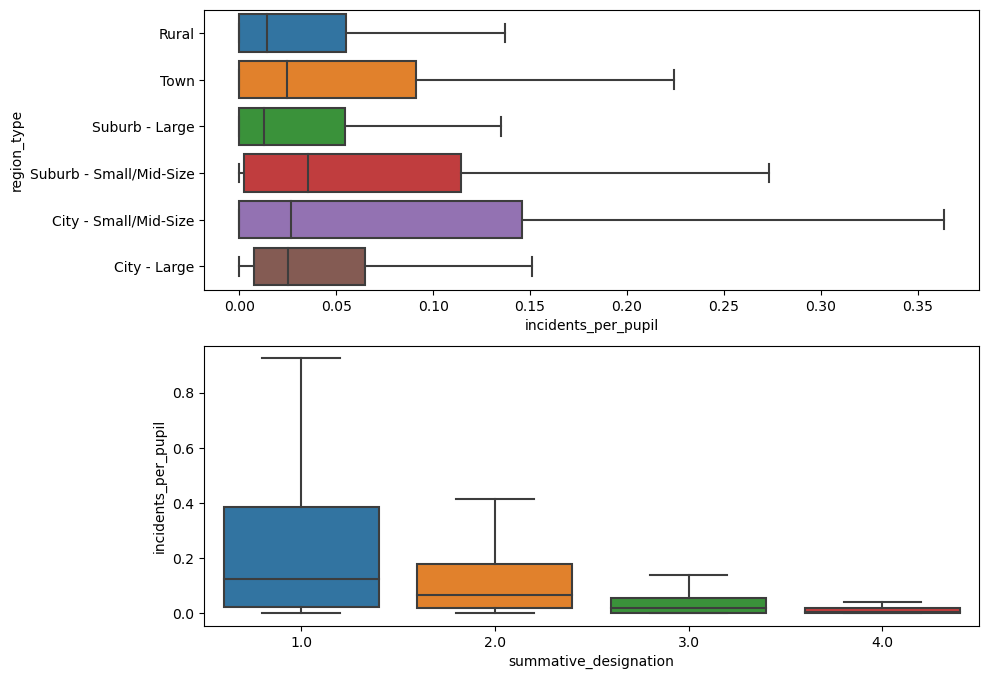

In [18]:
#create subplots
fig,ax = plt.subplots(2,1, figsize=(10,8))

sns.boxplot(orient='h',y=df['region_type'], x=df_adj['incidents_per_pupil'], showfliers=False, ax=ax[0])
sns.boxplot(x=df_adj['summative_designation'], y=df_adj['incidents_per_pupil'], showfliers=False, ax=ax[1]);

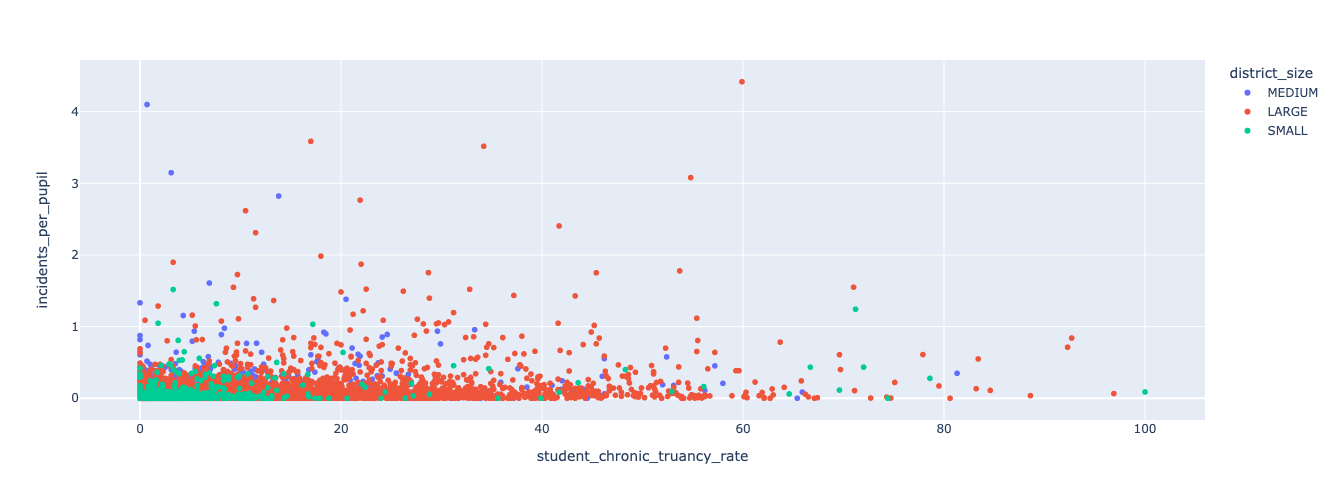

In [19]:
px.scatter(df_adj, x='student_chronic_truancy_rate', y='incidents_per_pupil',
           color = 'district_size',
           width=600, height=500)

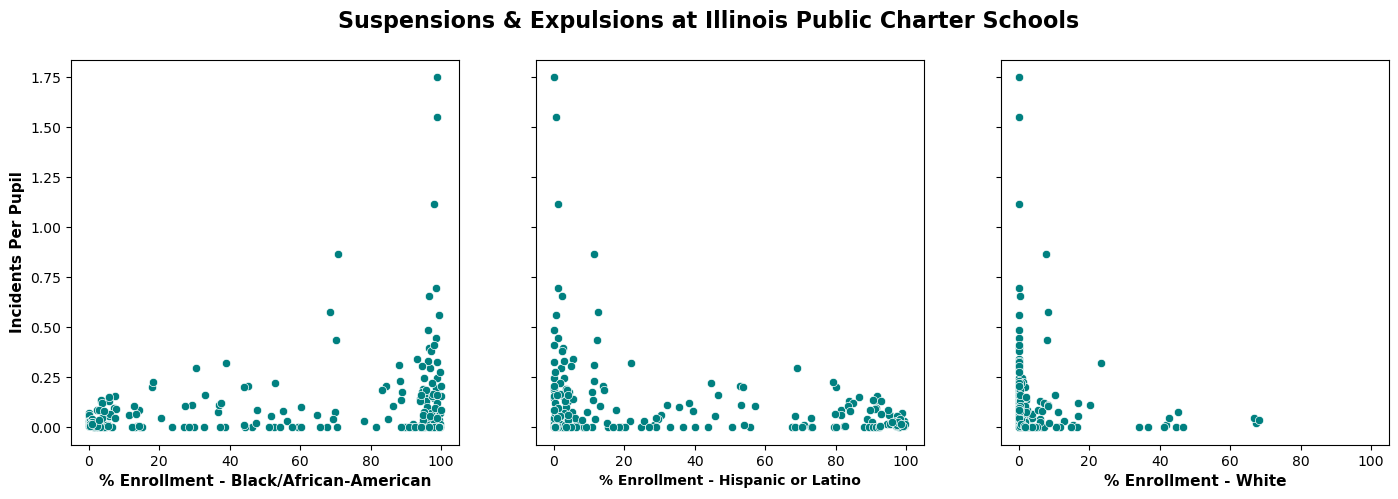

In [20]:
#create subplots
fig,ax = plt.subplots(1,3, figsize=(17,5), sharey=True, sharex=True)

sns.scatterplot(df_adj[df_adj['charter'] == 'Y'], x='%_student_enrollment_black_or_african_american', y='incidents_per_pupil', c='teal', ax=ax[0])
sns.scatterplot(df_adj[df_adj['charter'] == 'Y'], x='%_student_enrollment_hispanic_or_latino', y='incidents_per_pupil', c='teal', ax=ax[1])
sns.scatterplot(df_adj[df_adj['charter'] == 'Y'], x='%_student_enrollment_white', y='incidents_per_pupil', c='teal', ax=ax[2])

fig.suptitle('Suspensions & Expulsions at Illinois Public Charter Schools', fontsize=16, fontweight='bold')
ax[0].set_ylabel('Incidents Per Pupil', fontsize=11, fontweight='bold')
ax[0].set_xlabel('% Enrollment - Black/African-American', fontsize=11, fontweight='bold')
ax[1].set_xlabel('% Enrollment - Hispanic or Latino', fontsize=10, fontweight='bold')
ax[2].set_xlabel('% Enrollment - White', fontsize=11, fontweight='bold');

#export plot
plt.savefig('../Capstone/plots/charter.png',dpi=300, bbox_inches = "tight")

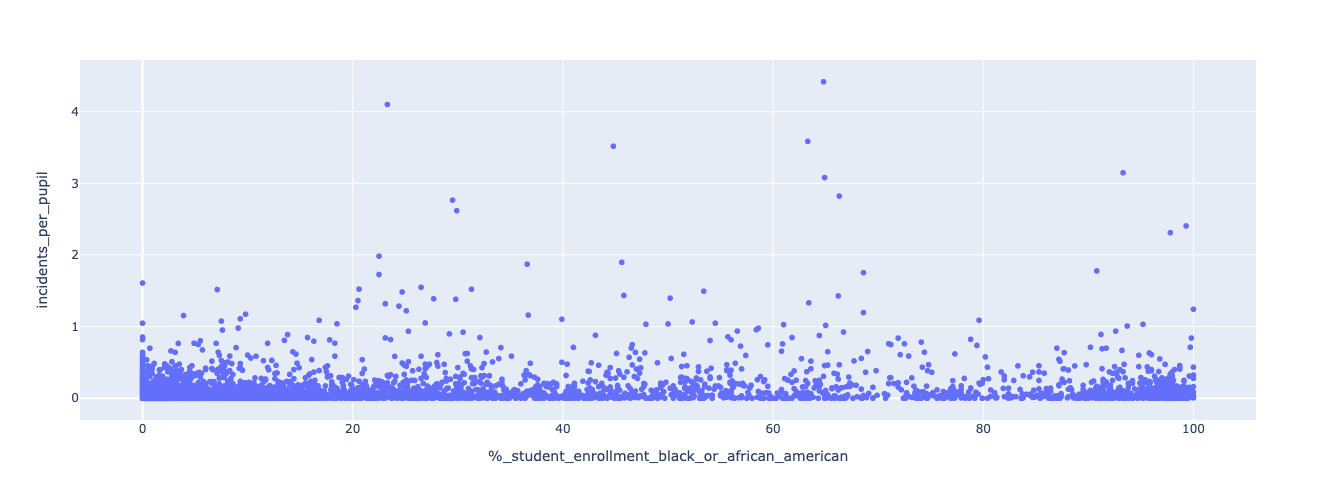

In [21]:
#you don't see the same trend in public schools as you see above
px.scatter(df_adj[df_adj['charter'] == 'N'], x='%_student_enrollment_black_or_african_american', y='incidents_per_pupil',
           # color = 'teacher_retention_rate',
           width=600, height=500)

#### Trends for Title I School Status

In [22]:
df['title_i_status'].value_counts()

Yes               4888
No                2150
Not Applicable    1415
Missing            589
Name: title_i_status, dtype: int64

In [23]:
#only rows where title i status is Y or N
title1 = df_adj[(df_adj['title_i_status'] == 'Yes') |(df['title_i_status'] == 'No')]

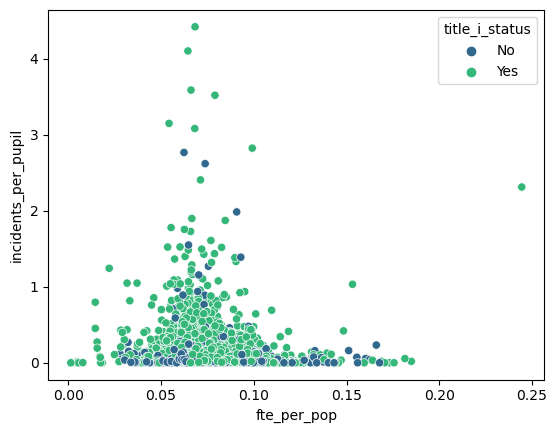

In [24]:
sns.scatterplot(data=title1, x='fte_per_pop', y='incidents_per_pupil', hue='title_i_status', palette='viridis');

In [25]:
title1['fte_per_pop'].describe()

count    6999.000000
mean        0.069796
std         0.015899
min         0.001437
25%         0.059841
50%         0.067840
75%         0.077253
max         0.244444
Name: fte_per_pop, dtype: float64

In [26]:
# schools with higher incidents per pupil are in the middle of the range of fte per pupil.
# There's an argument here for providing additional funding to be used for potential more social workers/psychologists, etc
# can use title IV funds to below - activities, can't really be used for personnel
# Re-entry programs and transition services for justice-involved youth
# Reducing use of exclusionary discipline practices and promoting supportive school discipline